## Phân tích dữ liệu

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('ViCTSD_train.csv')
X_train = train['Comment']
y_train = train['Toxicity']

In [3]:
test = pd.read_csv('ViCTSD_test.csv')
X_test = test['Comment']
y_test = test['Toxicity']

In [4]:
train.describe()

,Unnamed: 0,Constructiveness,Toxicity
count,7000.000000,7000.000000,7000.000000
mean,4981.787286,0.357571,0.108429
std,2890.451305,0.479319,0.310943
min,1.000000,0.000000,0.000000
25%,2478.750000,0.000000,0.000000
50%,4980.000000,0.000000,0.000000
75%,7461.250000,1.000000,0.000000
max,9998.000000,1.000000,1.000000


In [5]:
CTSD_counts = y_train.value_counts()
CTSD_counts

Toxicity
0    6241
1     759
Name: count, dtype: int64

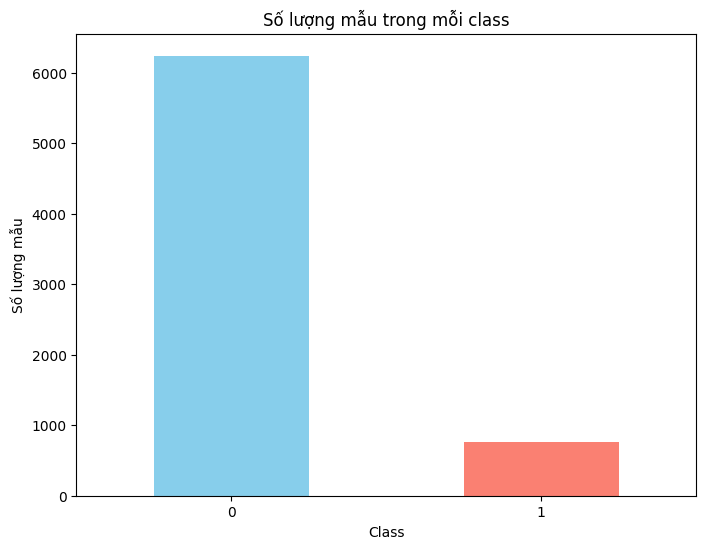

In [ ]:
# Vẽ biểu đồ cột
plt.figure(figsize=(8, 6))
CTSD_counts.plot(kind='bar', color=['skyblue', 'salmon'])

# Thêm tiêu đề và nhãn trục
plt.title('Số lượng mẫu trong mỗi class')
plt.xlabel('Class')
plt.ylabel('Số lượng mẫu')
plt.xticks(rotation=0)  # Giữ nhãn class theo chiều ngang
plt.show()

## Tiền xử lý dữ liệu

### Stopword

In [7]:
# Đọc stop words từ file
with open("preprocess/vietnamese-stopwords.txt", "r", encoding="utf-8") as file:
    stop_words = set(file.read().splitlines())

# Hàm loại bỏ stop words
def remove_stop_words(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

In [12]:
# Áp dụng hàm loại bỏ stop words lên cột 'texts' trong DataFrame
X_train_sw = X_train.apply(remove_stop_words)
X_test_sw = X_test.apply(remove_stop_words)

In [14]:
X_train.head(5)

0                                 Thật tuyệt vời...!!!
1    mỹ đã tuột dốc quá nhiều rồi, giờ muốn vực dậy...
2    tôi thấy người lái xe hơi bấm còi mới là người...
3    Coi dịch là giặc. Đã mang tên đó mà xâm nhập V...
4    Thương các bé quá! Các con còn quá nhỏ mà đã p...
Name: Comment, dtype: object

In [13]:
X_train_sw.head(5)

0                                      tuyệt vời...!!!
1                             mỹ tuột dốc rồi, vực dậy
2    lái xe hơi bấm còi "rất" lịch "quá" văn minh.đ...
3    Coi dịch giặc. xâm nhập VN đầu hàng cút xéo. V...
4    Thương bé quá! rời mẹ! chia buồn gia đình con,...
Name: Comment, dtype: object

### Word Segmentation

In [15]:
import py_vncorenlp

# Automatically download VnCoreNLP components from the original repository
# and save them in some local working folder
py_vncorenlp.download_model(save_dir='.')

VnCoreNLP model folder . already exists! Please load VnCoreNLP from this folder!


In [16]:
model = py_vncorenlp.VnCoreNLP(annotators=["wseg"], save_dir='.')

In [17]:
X_train_seg = [model.word_segment(sentence) for sentence in X_train_sw]
X_test_seg = [model.word_segment(sentence) for sentence in X_test_sw]

In [18]:
X_train_seg= [' '.join(sentence) for sentence in X_train_seg]
X_test_seg= [' '.join(sentence) for sentence in X_test_seg]

In [21]:
X_train_seg[:5]

['tuyệt_vời ... ! ! !',
 'mỹ tuột_dốc rồi , vực dậy',
 'lái_xe hơi bấm còi " rất " lịch " quá " văn minh.đường xá chung , người sử_dụng kiên_nhẫn dùng . bấm còi nháy đèn đòi ưu_tiên đi trước . đại mà .',
 'Coi dịch giặc . xâm_nhập VN đầu_hàng cút xéo . VN hào !',
 'Thương bé quá ! rời mẹ ! chia buồn gia_đình con , cầu_mong vui giới mới !']

### Replace Teencode

In [22]:
teencode_df = pd.read_csv('preprocess/teencode.txt',names=['teencode','map'],sep='\t',)

In [25]:
teencode_df.head(5)

,teencode,map
0,ctrai,con trai
1,khôg,không
2,bme,bố mẹ
3,cta,chúng ta
4,mih,mình


In [26]:
import re

def teencode(sentence):
    for teencode, map in zip(teencode_df['teencode'], teencode_df['map']):
        # Sử dụng regex để thay thế chỉ khi từ teencode đứng độc lập
        sentence = re.sub(rf'\b{teencode}\b', map, sentence)
    return sentence

In [27]:
teencode("omg , cái j z ? ")

'oh my god , cái gì vậy ? '

In [31]:
X_train_tc = [x.lower() if isinstance(x, str) else x for x in X_train_seg]
X_test_tc = [x.lower() if isinstance(x, str) else x for x in X_test_seg]

In [32]:
X_train_tc[:5]

['tuyệt_vời ... ! ! !',
 'mỹ tuột_dốc rồi , vực dậy',
 'lái_xe hơi bấm còi " rất " lịch " quá " văn minh.đường xá chung , người sử_dụng kiên_nhẫn dùng . bấm còi nháy đèn đòi ưu_tiên đi trước . đại mà .',
 'coi dịch giặc . xâm_nhập vn đầu_hàng cút xéo . vn hào !',
 'thương bé quá ! rời mẹ ! chia buồn gia_đình con , cầu_mong vui giới mới !']

In [34]:
X_train_tc = [teencode(sentence) for sentence in X_train_tc]

In [35]:
X_test_tc = [teencode(sentence) for sentence in X_test_tc]

## Save Data

In [ ]:
X_train_tc_df = pd.DataFrame(X_train_tc, columns=["texts"])
X_train_tc_df['toxicity'] = y_train

# Lưu DataFrame vào file CSV
X_train_tc_df.to_csv("Preprocessed_data/train.csv", index=False, encoding="utf-8")

In [ ]:
X_test_tc_df = pd.DataFrame(X_test_tc, columns=["texts"])
X_test_tc_df['toxicity'] = y_test

# Lưu DataFrame vào file CSV
X_test_tc_df.to_csv("data/Preprocessed_data/test.csv", index=False, encoding="utf-8")